# 時間序列(Time Series)預測 
### 程式修改自 [Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)

In [4]:
# 載入相關套件
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 載入測試資料
df2 = pd.read_csv('./RNN/monthly-airline-passengers.csv')
df2.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
df2.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(-20.0, 0, '1959-05'),
  Text(0.0, 0, '1949-01'),
  Text(20.0, 0, '1950-09'),
  Text(40.0, 0, '1952-05'),
  Text(60.0, 0, '1954-01'),
  Text(80.0, 0, '1955-09'),
  Text(100.0, 0, '1957-05'),
  Text(120.0, 0, '1959-01'),
  Text(140.0, 0, '1960-09'),
  Text(160.0, 0, '')])

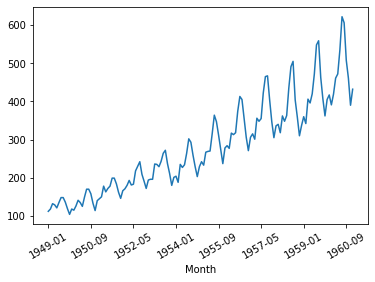

In [7]:
# 繪圖
df2 = df.set_index('Month')
df2.plot(legend=None)
plt.xticks(rotation=30)

In [8]:
# 轉換資料
from sklearn.preprocessing import MinMaxScaler

# 函數：以前期資料為 X，當前期資料為 Y
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

dataset = df2.values
dataset = dataset.astype('float32')

# X 常態化
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# 資料分割
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 以前期資料為 X，當期資料為 Y
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# 轉換為三維 [筆數, 落後期數, X維度]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [9]:
# 訓練模型
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)

# 模型評估
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

Epoch 1/100
94/94 [==============================] - 4s 3ms/step - loss: 0.0770
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0260
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0216
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0217
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0148
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0153
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0143
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0122
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 11/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 12/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 13/100
94/94 [=================

Train Score: 22.97 RMSE
Test Score: 51.44 RMSE


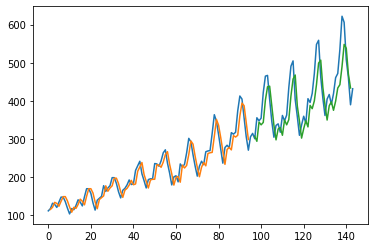

In [10]:
from sklearn.metrics import mean_squared_error
import math 

# 還原常態化的訓練及測試資料
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# 計算 RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# 訓練資料的 X/Y
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 測試資料 X/Y
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# 繪圖
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## 改變Loopback=3：X由前1期改為前3期 

In [11]:
# 載入測試資料
df = pd.read_csv('./RNN/monthly-airline-passengers.csv', usecols=[1])
print(df.head())
dataset = df.values
dataset = dataset.astype('float32')

# X 常態化
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# 資料分割
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 以前期資料為 X，當前期資料為 Y
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# 轉換為三維 [筆數, 落後期數, X維度]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

   Passengers
0         112
1         118
2         132
3         129
4         121


In [12]:
dataset

array([[0.01544401],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984557],
       [0.08494207],
       [0.08494207],
       [0.06177607],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123553],
       [0.04247104],
       [0.07142857],
       [0.05984557],
       [0.04054055],
       [0.08687258],
       [0.12741312],
       [0.12741312],
       [0.10424709],
       [0.05598456],
       [0.01930502],
       [0.06949806],
       [0.07915059],
       [0.08880308],
       [0.14285713],
       [0.11389962],
       [0.13127413],
       [0.14285713],
       [0.18339768],
       [0.18339768],
       [0.15444016],
       [0.11196911],
       [0.08108109],
       [0.1196911 ],
       [0.12934363],
       [0.14671814],
       [0.17181468],
       [0.14864865],
       [0.15250966],
       [0.22007722],
       [0.24324325],
       [0.26640925],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [13]:
trainX.shape

(92, 1, 3)

In [14]:
# 訓練模型
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)

# 模型評估
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

Epoch 1/100
92/92 [==============================] - 2s 3ms/step - loss: 0.0456
Epoch 2/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0140
Epoch 3/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 4/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 5/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0091
Epoch 6/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0075
Epoch 7/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0060
Epoch 8/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0043
Epoch 9/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 10/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 11/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 12/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0031
Epoch 13/100
92/92 [=================

Train Score: 20.71 RMSE
Test Score: 56.51 RMSE


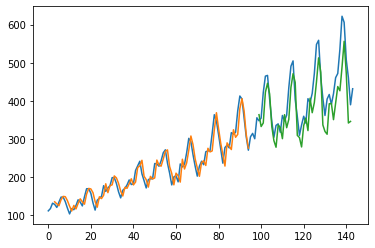

In [15]:
from sklearn.metrics import mean_squared_error
import math 

# 還原常態化的訓練資料
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# 計算 RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# 訓練資料的 X/Y
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 測試資料 X/Y
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# 繪圖
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## 改變落後期數(Time Steps)：X由t-1期改為t-3期(單期) 

In [16]:
# 載入測試資料
df = pd.read_csv('./RNN/monthly-airline-passengers.csv', usecols=[1])

dataset = df.values
dataset = dataset.astype('float32')

# X 常態化
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# 資料分割
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 以前期資料為 X，當前期資料為 Y
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# 轉換為三維 [筆數, 落後期數, X維度]
# trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [17]:
trainX.shape

(92, 3, 1)

In [18]:
# 訓練模型
model = Sequential()
# (1, look_back) 改為 (look_back, 1)
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)

# 模型評估
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

Epoch 1/100
92/92 [==============================] - 2s 3ms/step - loss: 0.0282
Epoch 2/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 3/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 4/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 5/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0050
Epoch 6/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 7/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 8/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 9/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 10/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 11/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 12/100
92/92 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 13/100
92/92 [=================

Train Score: 24.79 RMSE
Test Score: 52.74 RMSE


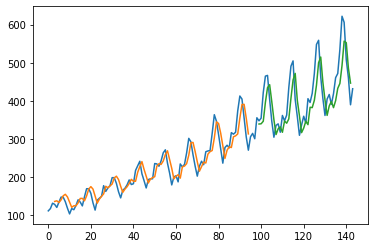

In [19]:
from sklearn.metrics import mean_squared_error
import math 

# 還原常態化的訓練資料
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# 計算 RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# 訓練資料的 X/Y
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 測試資料 X/Y
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# 繪圖
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## stateful=True

In [20]:
# 載入測試資料
df = pd.read_csv('./RNN/monthly-airline-passengers.csv', usecols=[1])

dataset = df.values
dataset = dataset.astype('float32')

# X 常態化
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# 資料分割
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 以前期資料為 X，當前期資料為 Y
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# 轉換為三維 [筆數, 落後期數, X維度]
# trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [21]:
# 訓練模型
model = Sequential()
# (1, look_back) 改為 (look_back, 1)
# model.add(LSTM(4, input_shape=(look_back, 1)))
batch_size = 1
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)
for i in range(100):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, 
              shuffle=False, verbose=2)
    # 重置狀態(cell state)
    model.reset_states()

# 模型評估
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

92/92 - 2s - loss: 0.0052
92/92 - 0s - loss: 0.0085
92/92 - 0s - loss: 0.0069
92/92 - 0s - loss: 0.0057
92/92 - 0s - loss: 0.0051
92/92 - 0s - loss: 0.0049
92/92 - 0s - loss: 0.0048
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0042
92/92 - 0s -

Train Score: 27.54 RMSE
Test Score: 63.90 RMSE


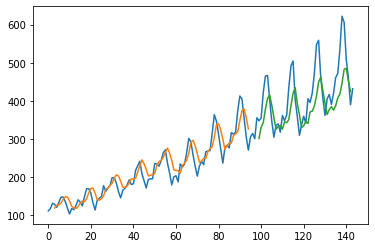

In [22]:
from sklearn.metrics import mean_squared_error
import math 

# 還原常態化的訓練資料
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# 計算 RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# 訓練資料的 X/Y
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 測試資料 X/Y
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# 繪圖
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

## Stacked LSTM

In [23]:
# 載入測試資料
df = pd.read_csv('./RNN/monthly-airline-passengers.csv', usecols=[1])

dataset = df.values
dataset = dataset.astype('float32')

# X 常態化
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# 資料分割
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# 以前期資料為 X，當前期資料為 Y
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# 轉換為三維 [筆數, 落後期數, X維度]
# trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
# testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [24]:
# 訓練模型
model = Sequential()
# (1, look_back) 改為 (look_back, 1)
# model.add(LSTM(4, input_shape=(look_back, 1)))
batch_size = 1

# Stacked LSTM
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1),
               stateful=True, return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1),
               stateful=True))

model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)
for i in range(100):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, 
              shuffle=False, verbose=2)
    # 重置狀態(cell state)
    model.reset_states()

# 模型評估
trainPredict = model.predict(trainX, batch_size=batch_size)
# 重置狀態(cell state)
model.reset_states() 
testPredict = model.predict(testX, batch_size=batch_size)

92/92 - 3s - loss: 0.0049
92/92 - 0s - loss: 0.0161
92/92 - 0s - loss: 0.0103
92/92 - 0s - loss: 0.0073
92/92 - 0s - loss: 0.0060
92/92 - 0s - loss: 0.0057
92/92 - 0s - loss: 0.0058
92/92 - 0s - loss: 0.0059
92/92 - 0s - loss: 0.0059
92/92 - 0s - loss: 0.0059
92/92 - 0s - loss: 0.0059
92/92 - 0s - loss: 0.0059
92/92 - 0s - loss: 0.0059
92/92 - 0s - loss: 0.0058
92/92 - 0s - loss: 0.0058
92/92 - 0s - loss: 0.0058
92/92 - 0s - loss: 0.0058
92/92 - 0s - loss: 0.0058
92/92 - 0s - loss: 0.0057
92/92 - 0s - loss: 0.0057
92/92 - 0s - loss: 0.0057
92/92 - 0s - loss: 0.0057
92/92 - 0s - loss: 0.0056
92/92 - 0s - loss: 0.0056
92/92 - 0s - loss: 0.0056
92/92 - 0s - loss: 0.0056
92/92 - 0s - loss: 0.0055
92/92 - 0s - loss: 0.0055
92/92 - 0s - loss: 0.0055
92/92 - 0s - loss: 0.0054
92/92 - 0s - loss: 0.0054
92/92 - 0s - loss: 0.0053
92/92 - 0s - loss: 0.0053
92/92 - 0s - loss: 0.0053
92/92 - 0s - loss: 0.0052
92/92 - 0s - loss: 0.0052
92/92 - 0s - loss: 0.0051
92/92 - 0s - loss: 0.0051
92/92 - 0s -

Train Score: 20.18 RMSE
Test Score: 59.79 RMSE


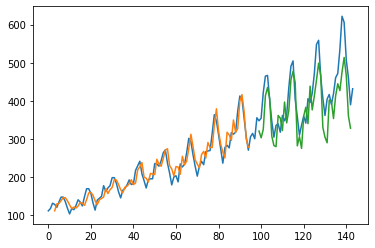

In [25]:
from sklearn.metrics import mean_squared_error
import math 

# 還原常態化的訓練資料
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# 計算 RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# 訓練資料的 X/Y
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# 測試資料 X/Y
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# 繪圖
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()